Need to mount the drive to acess the dataset since the dataset is large.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install python_speech_features

  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5868 sha256=409cc9e7e5ce6fe11735c534c044fcc3579db2f56a70b62421d9261fb7a1e218
  Stored in directory: /root/.cache/pip/wheels/37/01/19/e6c69a32684ab7b2e3ea4985a571d810cf055c72600e7f9f17
Successfully built python_speech_features


###Imports and Load data

In [3]:
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
from python_speech_features import mfcc
import seaborn as sns
import librosa.display
import librosa

import os
import math
import pickle
import random
import operator


import math
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Additional libraries for data preprocessing and visualization
import cv2
from sklearn.model_selection import train_test_split


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Data'

In [4]:
data = pd.read_csv('/content/drive/MyDrive/features_3_sec.csv')


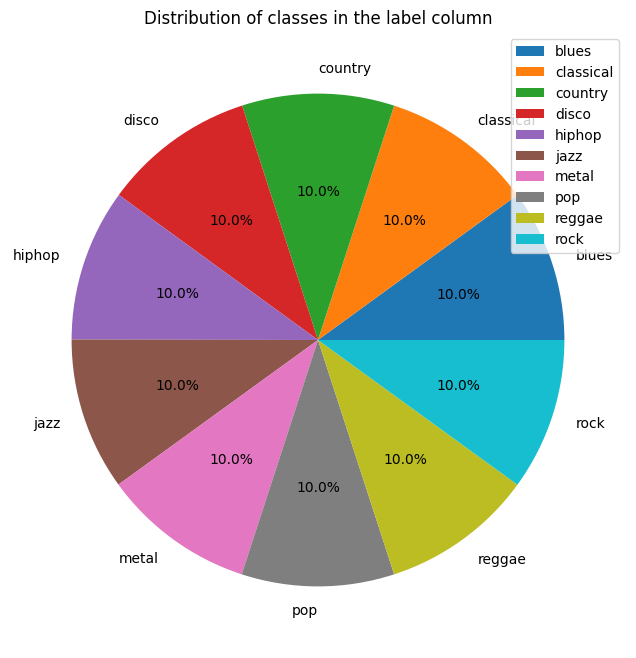

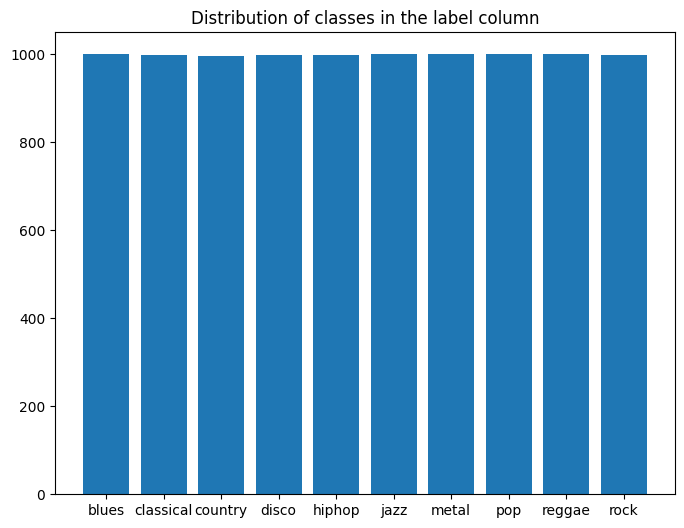

In [5]:
#visualize the distribution of classes in the label column
count = [] #count of each data value
labels = data['label'].unique() #distinct label values

for i in labels:
  count.append(data[data['label']==i]['label'].count()) #storing count and labels in same order

#pie chart
plt.figure(figsize=(8, 8)) #size of figure
plt.pie(count, labels = labels,autopct='%1.1f%%') #pie chart labels and corresponding values
plt.title('Distribution of classes in the label column') #title of pie chart
plt.legend() #displays the legend
plt.show() #displays the pie chart

#bar plot
plt.figure(figsize=(8, 6)) #size of figure
plt.bar(labels, count) #(x axis, y axis)
plt.title('Distribution of classes in the label column') # title of bar plot
plt.show() #displays the graph



### Random Forest Model

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

data = data.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
scaled_df = pd.DataFrame(np_scaled, columns = cols)
scaled_df.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.0,0.355399,0.716757,0.293133,0.107955,0.262173,0.034784,0.459205,0.094130,0.346153,...,0.363613,0.056198,0.397172,0.066062,0.371828,0.055344,0.380831,0.026797,0.506746,0.047781
1,0.0,0.367322,0.670347,0.253040,0.044447,0.270969,0.018716,0.470831,0.052261,0.363722,...,0.468596,0.092912,0.351681,0.074001,0.362068,0.076365,0.418452,0.082414,0.593029,0.065548
2,0.0,0.373159,0.728067,0.296753,0.141663,0.265293,0.023073,0.494051,0.059922,0.378215,...,0.479681,0.096704,0.420979,0.050639,0.400536,0.067509,0.433742,0.043841,0.546264,0.036062
3,0.0,0.399349,0.677066,0.298024,0.075042,0.238427,0.023187,0.455246,0.066234,0.329587,...,0.386258,0.067995,0.387474,0.050617,0.380430,0.050030,0.405824,0.041898,0.562204,0.034873
4,0.0,0.355668,0.689113,0.322308,0.052149,0.233460,0.016451,0.451651,0.047830,0.318453,...,0.438567,0.042500,0.460314,0.083860,0.388590,0.076524,0.409019,0.020763,0.517913,0.031713


In [7]:
# Assuming X contains your features and y contains the corresponding labels
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)



Classification Report:
              precision    recall  f1-score   support

       blues       0.87      0.87      0.87       208
   classical       0.94      0.98      0.96       203
     country       0.80      0.84      0.82       186
       disco       0.85      0.83      0.84       199
      hiphop       0.92      0.89      0.90       218
        jazz       0.86      0.93      0.89       192
       metal       0.87      0.95      0.91       204
         pop       0.92      0.95      0.93       180
      reggae       0.92      0.88      0.90       211
        rock       0.89      0.72      0.79       197

    accuracy                           0.88      1998
   macro avg       0.88      0.88      0.88      1998
weighted avg       0.88      0.88      0.88      1998



<ipython-input-8-e7f1ac455952>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="importance", y="feature", data=feature_importances, palette="viridis")


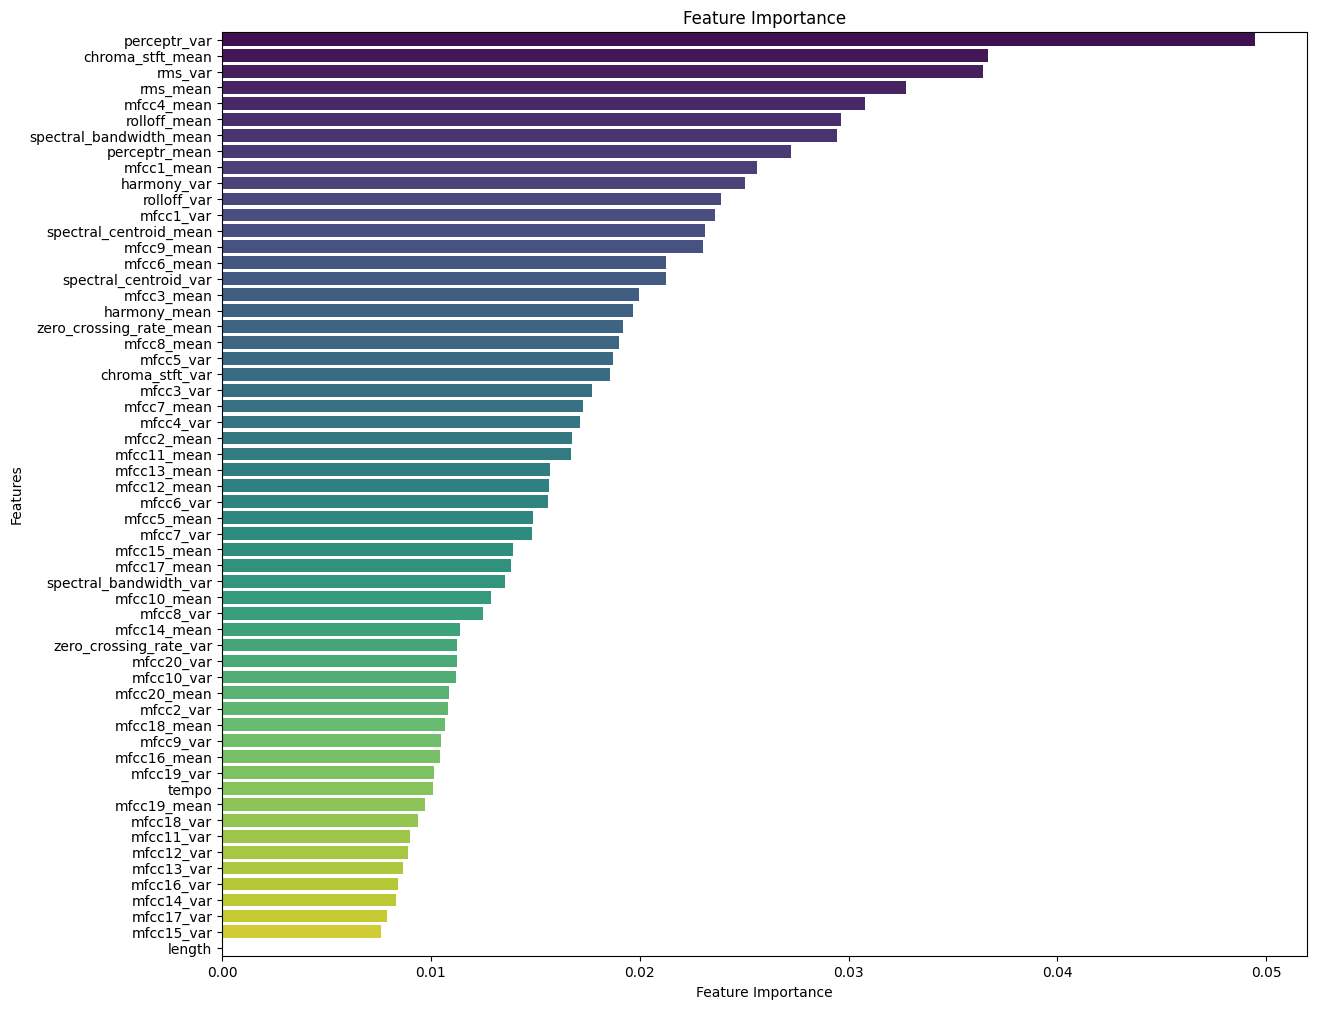

In [8]:
#Visualize Feature Importances #24
#added
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})


feature_importances=feature_importances.sort_values(by="importance" ,ascending =False)

#plot

plt.figure(figsize=(14,12))
sns.barplot(x="importance", y="feature", data=feature_importances, palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.show()

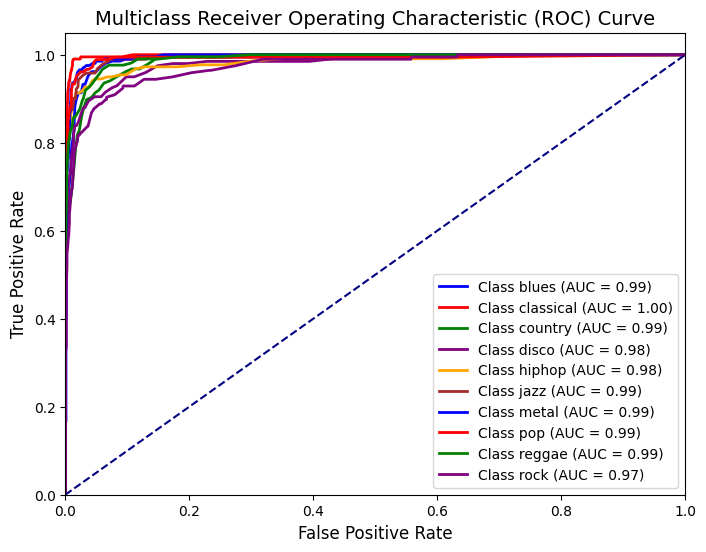

In [9]:
#Create a function to plot the ROC curve for the model. #29
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

def plot_multiclass_roc(model, X_test, y_test, class_labels):

    # Binarize the labels
    y_test_bin = label_binarize(y_test, classes=class_labels)
    n_classes = y_test_bin.shape[1]

    # Get predicted probabilities
    y_probs = model.predict_proba(X_test)

    # Plot ROC curve for each class
    plt.figure(figsize=(8, 6))
    colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown']
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color=colors[i % len(colors)], lw=2,
                 label=f"Class {class_labels[i]} (AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], color="navy", linestyle="--")

    # Labels and title
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate", fontsize=12)
    plt.ylabel("True Positive Rate", fontsize=12)
    plt.title("Multiclass Receiver Operating Characteristic (ROC) Curve", fontsize=14)
    plt.legend(loc="lower right")
    plt.show()

class_labels = np.unique(y_test)

# Call the function
plot_multiclass_roc(rf_model, X_test, y_test, class_labels)

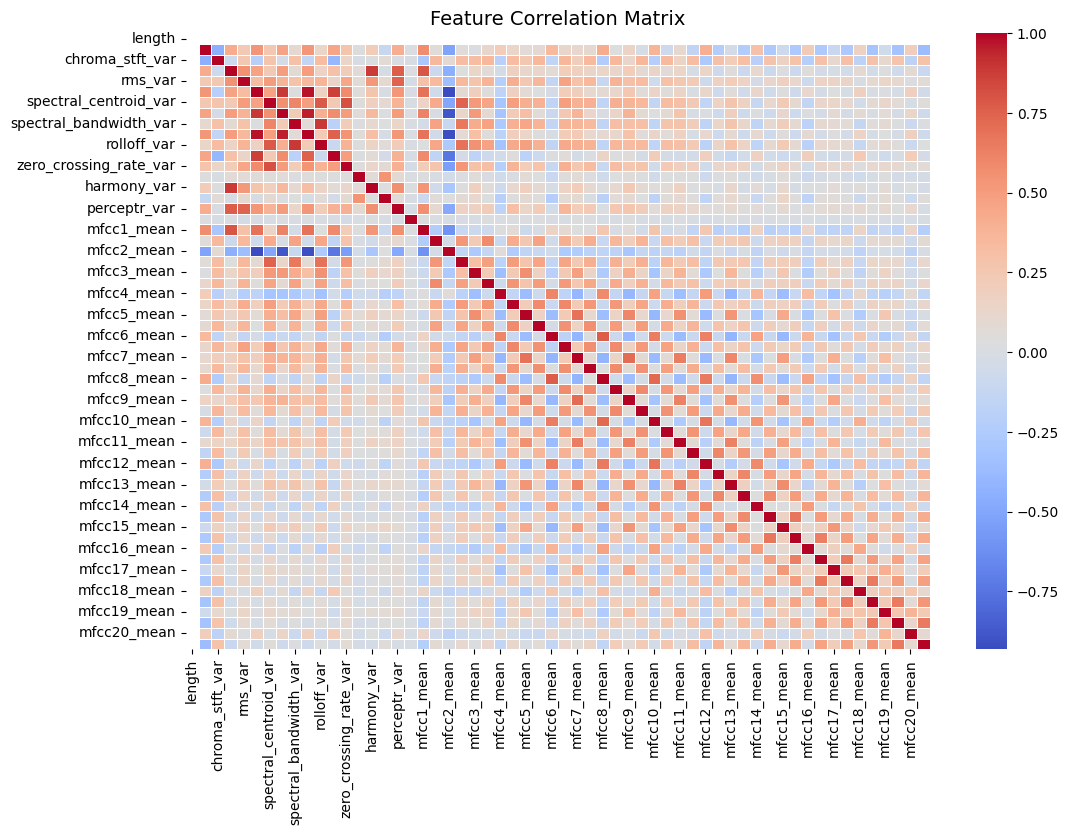

In [10]:
#Use sns.heatmap to visualize the correlation matrix of features in the dataset. #31

import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_matrix(data):
    plt.figure(figsize=(12, 8))
    correlation_matrix = data.corr()

    # Plot heatmap
    sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Feature Correlation Matrix", fontsize=14)
    plt.show()

plot_correlation_matrix(X)


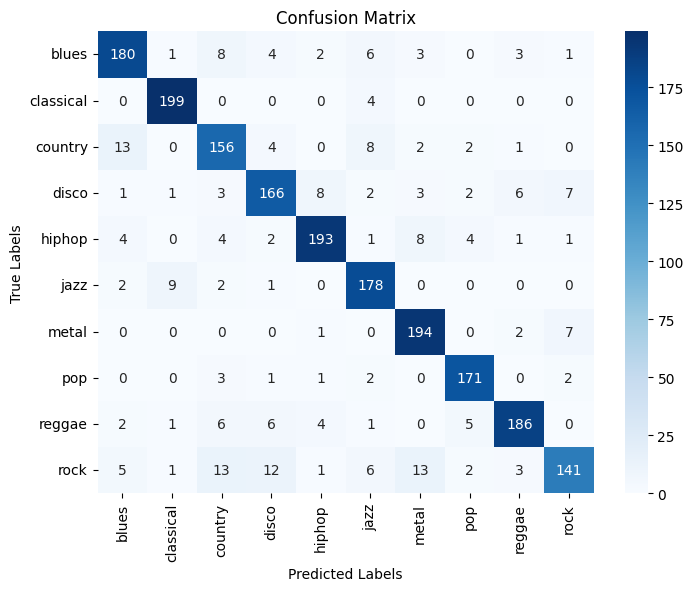

In [11]:
#Visualize the Confusion Matrix #25

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, class_labels):

    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

class_labels = y.unique()
plot_confusion_matrix(y_test, y_pred, class_labels)


SVM Accuracy: 0.7588

Classification Report:
               precision    recall  f1-score   support

       blues       0.72      0.77      0.75       208
   classical       0.86      0.97      0.91       203
     country       0.70      0.69      0.69       186
       disco       0.62      0.68      0.65       199
      hiphop       0.83      0.72      0.77       218
        jazz       0.79      0.80      0.80       192
       metal       0.83      0.91      0.87       204
         pop       0.83      0.87      0.85       180
      reggae       0.77      0.70      0.73       211
        rock       0.61      0.48      0.54       197

    accuracy                           0.76      1998
   macro avg       0.76      0.76      0.76      1998
weighted avg       0.76      0.76      0.76      1998



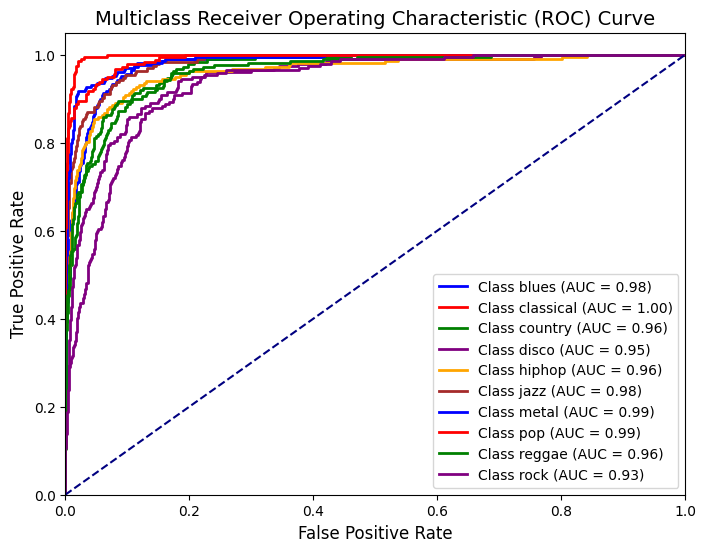

K-Nearest Neighbors Accuracy: 0.9109

Classification Report:
               precision    recall  f1-score   support

       blues       0.94      0.91      0.92       208
   classical       0.91      0.97      0.94       203
     country       0.83      0.89      0.86       186
       disco       0.88      0.92      0.90       199
      hiphop       0.93      0.88      0.90       218
        jazz       0.91      0.90      0.90       192
       metal       0.98      0.97      0.97       204
         pop       0.96      0.90      0.93       180
      reggae       0.91      0.92      0.92       211
        rock       0.88      0.85      0.87       197

    accuracy                           0.91      1998
   macro avg       0.91      0.91      0.91      1998
weighted avg       0.91      0.91      0.91      1998



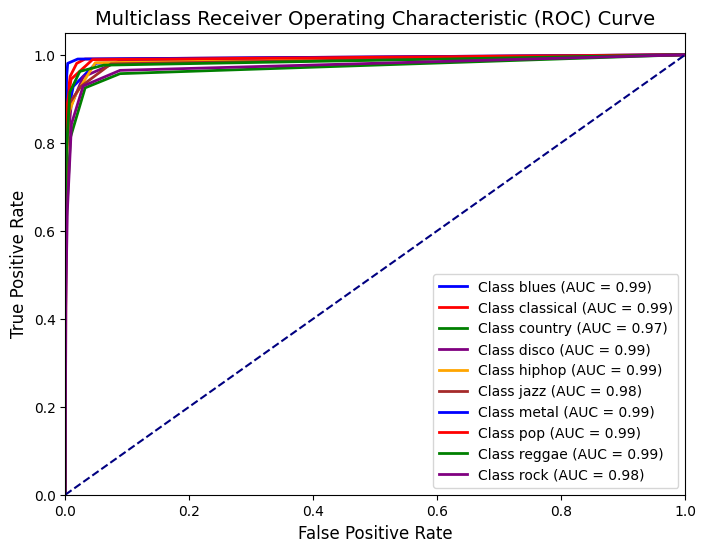

Naive Bayes Accuracy: 0.5230

Classification Report:
               precision    recall  f1-score   support

       blues       0.51      0.31      0.39       208
   classical       0.76      0.89      0.82       203
     country       0.39      0.60      0.47       186
       disco       0.40      0.36      0.38       199
      hiphop       0.71      0.36      0.48       218
        jazz       0.66      0.41      0.51       192
       metal       0.47      0.91      0.62       204
         pop       0.57      0.78      0.66       180
      reggae       0.59      0.48      0.53       211
        rock       0.26      0.16      0.20       197

    accuracy                           0.52      1998
   macro avg       0.53      0.53      0.50      1998
weighted avg       0.53      0.52      0.50      1998



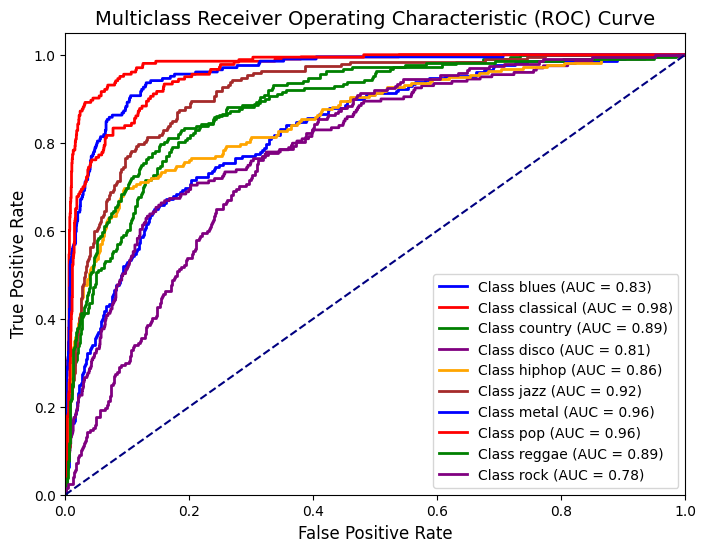

Decision Tree Accuracy: 0.6491

Classification Report:
               precision    recall  f1-score   support

       blues       0.60      0.58      0.59       208
   classical       0.86      0.81      0.83       203
     country       0.51      0.50      0.50       186
       disco       0.55      0.55      0.55       199
      hiphop       0.68      0.65      0.66       218
        jazz       0.65      0.72      0.68       192
       metal       0.76      0.76      0.76       204
         pop       0.70      0.83      0.76       180
      reggae       0.70      0.61      0.65       211
        rock       0.48      0.49      0.48       197

    accuracy                           0.65      1998
   macro avg       0.65      0.65      0.65      1998
weighted avg       0.65      0.65      0.65      1998



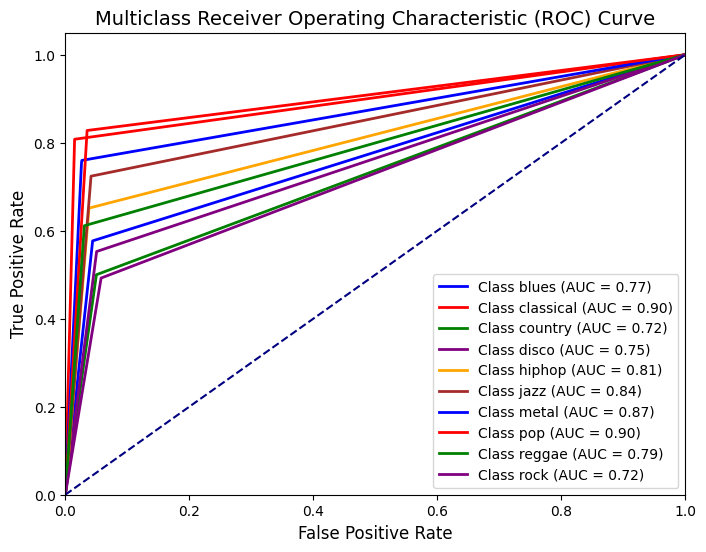

Gradient Boosting Accuracy: 0.8373

Classification Report:
               precision    recall  f1-score   support

       blues       0.84      0.81      0.82       208
   classical       0.92      0.97      0.94       203
     country       0.70      0.79      0.74       186
       disco       0.78      0.80      0.79       199
      hiphop       0.90      0.82      0.86       218
        jazz       0.84      0.88      0.86       192
       metal       0.92      0.91      0.92       204
         pop       0.85      0.92      0.88       180
      reggae       0.85      0.80      0.83       211
        rock       0.78      0.69      0.73       197

    accuracy                           0.84      1998
   macro avg       0.84      0.84      0.84      1998
weighted avg       0.84      0.84      0.84      1998



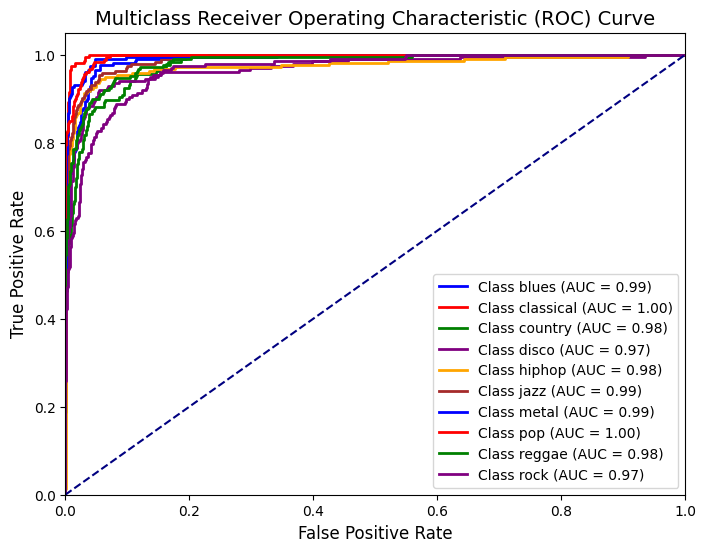

Logistic Regression Accuracy: 0.6982

Classification Report:
               precision    recall  f1-score   support

       blues       0.64      0.68      0.66       208
   classical       0.83      0.94      0.88       203
     country       0.58      0.60      0.59       186
       disco       0.63      0.59      0.61       199
      hiphop       0.74      0.66      0.70       218
        jazz       0.76      0.72      0.74       192
       metal       0.73      0.90      0.80       204
         pop       0.73      0.85      0.78       180
      reggae       0.70      0.63      0.67       211
        rock       0.58      0.42      0.49       197

    accuracy                           0.70      1998
   macro avg       0.69      0.70      0.69      1998
weighted avg       0.69      0.70      0.69      1998



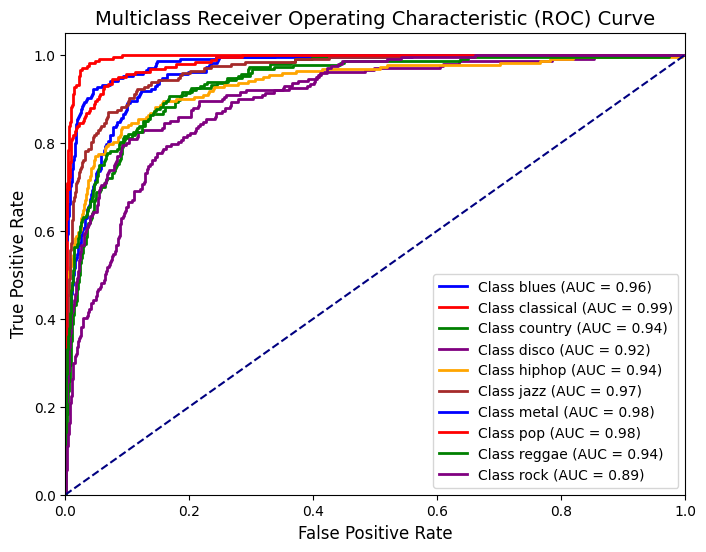

In [12]:
# Testing other ML Algorithms

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define a dictionary of models to test
models = {
    "SVM": SVC(probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}\n")

    print("Classification Report:\n", classification_report(y_test, y_pred))

    # If the model supports probability predictions, plot the ROC curve
    if hasattr(model, "predict_proba"):
        plot_multiclass_roc(model, X_test, y_test, class_labels=labels)


Model Accuracy

K-Nearest Neighbors (KNN) 91.09%

Gradient Boosting 83.73%

Support Vector Machine (SVM) 75.88%

Logistic Regression 69.82%

Decision Tree 64.91%

Naïve Bayes 52.30%

If computational efficiency is a priority, Gradient Boosting is a strong choice over KNN, as KNN can be slow for large datasets. KNN is the best for raw accuracy, but it may not scale well with larger datasets.